In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix


# If you have these qualifications, is it more worth to further education or more experience for each level?

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('Levels_Fyi_Salary_Data.csv')
amazon = data[data['company'] == 'Amazon']
amazon = amazon.replace({'level':{'SDE I':'L4','SDE II':'L5','SDE III':'L6','L6 SDM':'L6','6':'L6','L5 SDM':'L5','Principal SDE':'L7','Senior SDE':'L6','5':'L5','7':'L7','4':'L4','1':'L1','l5':'L5','l4':'L4','l6':'L6','l7':'L7','l1':'L1','l2':'L2','l3':'L3','2':'L2','3':'L3'}})
cleaned = amazon.loc[(amazon['level']=='L4') | (amazon['level']=='L5') | (amazon['level']=='L6') | (amazon['level']=='L7') | (amazon['level']=='L8')]
cleaned = cleaned.sort_values(by=['level','totalyearlycompensation'], ascending=[False,False])

# from here onwards only add items

In [3]:
print("PermaHeadDamage:\n",data['Doctorate_Degree'].value_counts())
print("Masters:\n",data['Masters_Degree'].value_counts())
print("Bachelors:\n",data['Bachelors_Degree'].value_counts())
print("Highschool:\n",data['Highschool'].value_counts())
print("education:\n",data['Education'].value_counts())
fillededu = data[data['Education'].notnull()]
#fillededu.info()
#fillededu['company'].value_counts()
top5 = fillededu[fillededu['company'].isin(['Facebook','Google','Amazon','Apple','Microsoft'])]
#top5.info()
top5['company'].value_counts()

PermaHeadDamage:
 0    60839
1     1803
Name: Doctorate_Degree, dtype: int64
Masters:
 0    47251
1    15391
Name: Masters_Degree, dtype: int64
Bachelors:
 0    50037
1    12605
Name: Bachelors_Degree, dtype: int64
Highschool:
 0    62322
1      320
Name: Highschool, dtype: int64
education:
 Master's Degree      15391
Bachelor's Degree    12601
PhD                   1703
Some College           355
Highschool             320
Name: Education, dtype: int64


Amazon       3665
Microsoft    2310
Google       1917
Facebook     1431
Apple         915
Name: company, dtype: int64

In [4]:
cleanedL4IQRcomp = cleaned[cleaned['level']=='L4'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L4'].totalyearlycompensation.quantile(0.25)
cleanedL5IQRcomp = cleaned[cleaned['level']=='L5'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L5'].totalyearlycompensation.quantile(0.25)
cleanedL6IQRcomp = cleaned[cleaned['level']=='L6'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L6'].totalyearlycompensation.quantile(0.25)
cleanedL7IQRcomp = cleaned[cleaned['level']=='L7'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L7'].totalyearlycompensation.quantile(0.25)
cleanedL8IQRcomp = cleaned[cleaned['level']=='L8'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L8'].totalyearlycompensation.quantile(0.25)

cleanedL4upperboundcomp = cleaned[cleaned['level']=='L4'].totalyearlycompensation.quantile(0.75) + (1.5*cleanedL4IQRcomp)
cleanedL5upperboundcomp = cleaned[cleaned['level']=='L5'].totalyearlycompensation.quantile(0.75) + (1.5*cleanedL5IQRcomp)
cleanedL6upperboundcomp = cleaned[cleaned['level']=='L6'].totalyearlycompensation.quantile(0.75) + (1.5*cleanedL6IQRcomp)
cleanedL7upperboundcomp = cleaned[cleaned['level']=='L7'].totalyearlycompensation.quantile(0.75) + (1.5*cleanedL7IQRcomp)
cleanedL8upperboundcomp = cleaned[cleaned['level']=='L8'].totalyearlycompensation.quantile(0.75) + (1.5*cleanedL8IQRcomp)

In [5]:
applemerick = data[(data['company'] == 'Apple')&(data['title']=='Software Engineer')]
applemerick = applemerick.replace({'level':{'ict 2':'ICT2','ic2':'ICT2','ICT 2':'ICT2','IC2':'ICT2','New Grad (ICT2)':'ICT3'}})
applemerick = applemerick.replace({'level':{'ict3':'ICT3','ICT 3':'ICT3','IC3':'ICT3','ict3':'ICT3','ic3':'ICT3','ITC3':'ICT3','Ict3':'ICT3','Ic3':'ICT3'}})
applemerick = applemerick.replace({'level':{'ict4':'ICT4','ICT 4':'ICT4','IC4':'ICT4','ict4':'ICT4','ic4':'ICT4','ITC4':'ICT4','Ict4':'ICT4','Ic4':'ICT4','Ict 4':'ICT4','ICT-4':'ICT4','Senior Software Engineer':'ICT4'}})
applemerick = applemerick.replace({'level':{'ict5':'ICT5','ICT 5':'ICT5','IC5':'ICT5','ict5':'ICT5','ic5':'ICT5','ITC5':'ICT5','Ict5':'ICT5','Ic5':'ICT5','Ict 5':'ICT5','ICT-5':'ICT5','ICT - 5':'ICT5'}})
applemerick = applemerick.loc[(applemerick['level'] == 'ICT2') | (applemerick['level']=='ICT3') | (applemerick['level']=='ICT4') | (applemerick['level']=='ICT5')| (applemerick['level']=='ICT6')]

applemerick['level']=np.where(applemerick['level']=='ICT2','L4',applemerick['level'])

applemerick['level']=np.where((applemerick['totalyearlycompensation']<=cleanedL4upperboundcomp)&(applemerick['level']=='ICT3'),'L4',applemerick['level'])
applemerick['level']=np.where((applemerick['totalyearlycompensation']>cleanedL4upperboundcomp)&(applemerick['level']=='ICT3'),'L5',applemerick['level'])

applemerick['level']=np.where((applemerick['level']=='ICT4')&(applemerick['totalyearlycompensation']<=cleanedL5upperboundcomp),'L5',applemerick['level'])
applemerick['level']=np.where((applemerick['level']=='ICT4')&(applemerick['totalyearlycompensation']>cleanedL5upperboundcomp),'L6',applemerick['level'])

applemerick['level']=np.where((applemerick['level']=='ICT5')&(applemerick['totalyearlycompensation']<=cleanedL6upperboundcomp),'L6',applemerick['level'])
applemerick['level']=np.where((applemerick['level']=='ICT5')&(applemerick['totalyearlycompensation']>cleanedL6upperboundcomp),'L7',applemerick['level'])

applemerick['level']=np.where((applemerick['level']=='ICT6')&(applemerick['totalyearlycompensation']<=cleanedL7upperboundcomp),'L7',applemerick['level'])
applemerick['level']=np.where((applemerick['level']=='ICT6')&(applemerick['totalyearlycompensation']>cleanedL7upperboundcomp),'L8',applemerick['level'])


In [6]:
googlejw = data[(data['company'] == 'Google')&(data['title']=='Software Engineer')]
amazonIQRcompL4 = cleaned[cleaned['level']=='L4'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L4'].totalyearlycompensation.quantile(0.25)
amazonIQRcompL5 = cleaned[cleaned['level']=='L5'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L5'].totalyearlycompensation.quantile(0.25)
amazonIQRcompL6 = cleaned[cleaned['level']=='L6'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L6'].totalyearlycompensation.quantile(0.25)
amazonIQRcompL7 = cleaned[cleaned['level']=='L7'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L7'].totalyearlycompensation.quantile(0.25)
amazonIQRcompL8 = cleaned[cleaned['level']=='L8'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L8'].totalyearlycompensation.quantile(0.25)

amazonupperboundcompL4 = cleaned[cleaned['level']=='L4'].totalyearlycompensation.quantile(0.75) + (1.5*amazonIQRcompL4)
amazonupperboundcompL5 = cleaned[cleaned['level']=='L5'].totalyearlycompensation.quantile(0.75) + (1.5*amazonIQRcompL5)
amazonupperboundcompL6 = cleaned[cleaned['level']=='L6'].totalyearlycompensation.quantile(0.75) + (1.5*amazonIQRcompL6)
amazonupperboundcompL7 = cleaned[cleaned['level']=='L7'].totalyearlycompensation.quantile(0.75) + (1.5*amazonIQRcompL7)
amazonupperboundcompL8 = cleaned[cleaned['level']=='L8'].totalyearlycompensation.quantile(0.75) + (1.5*amazonIQRcompL8)

googlejw = googlejw.replace({'level':{'SWE II':'L3','SWE III':'L4','Senior SWE':'L5','Staff SWE':'L6','Senior Staff SWE':'L7','Principal Engineer':'L8','4':'L4','5':'L5','3':'L3','6':'L6','7':'L7','8':'L8','L3 software engineer':'L3','l3':'L3','l4':'L4','l5':'L5','l6':'L6','l7':'L7','l8':'L8','L3 New Grad':'L3','Manager (L6)':'L6','L6 {Staff)':'L6', 'SWE L5':'L5','Senior L5': 'L5' }})
googlecleaned = googlejw.loc[(googlejw['level'] == 'L3') | (googlejw['level']=='L4') | (googlejw['level']=='L5') | (googlejw['level']=='L6') | (googlejw['level']=='L7') | (googlejw['level']=='L8')]



googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']<=amazonupperboundcompL4)&(googlecleaned['level']=='L3'),'L4a',googlecleaned['level'])
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']>amazonupperboundcompL4)&(googlecleaned['level']=='L3'),'L5a',googlecleaned['level'])
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']<=amazonupperboundcompL5)&(googlecleaned['level']=='L4'),'L4a',googlecleaned['level'])
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']>amazonupperboundcompL5)&(googlecleaned['level']=='L4'),'L5a',googlecleaned['level'])
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']<=amazonupperboundcompL6)&(googlecleaned['level']=='L5'),'L5a',googlecleaned['level'])
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']>amazonupperboundcompL6)&(googlecleaned['level']=='L5'),'L6a',googlecleaned['level'])
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']<=amazonupperboundcompL7)&(googlecleaned['level']=='L6'),'L6a',googlecleaned['level'])
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']>amazonupperboundcompL7)&(googlecleaned['level']=='L6'),'L7a',googlecleaned['level'])

googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']<=amazonupperboundcompL8)&(googlecleaned['level']=='L7'),'L7a',googlecleaned['level'])
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']<=amazonupperboundcompL8)&(googlecleaned['level']=='L7'),'L8a',googlecleaned['level'])

newcleanedgoogle = googlecleaned.replace({'level':{'L4a':'L4','L5a': 'L5', 'L6a': 'L6', 'L7a': 'L7', 'L8a': 'L8'}})
newgoogleclean = newcleanedgoogle.loc[(newcleanedgoogle['level'] == 'L3') | (newcleanedgoogle['level']=='L4') | (newcleanedgoogle['level']=='L5') | (newcleanedgoogle['level']=='L6') | (newcleanedgoogle['level']=='L7') | (newcleanedgoogle['level']=='L8')]
print(newgoogleclean['level'].value_counts())

L4    1938
L5     768
L6     179
L7      55
L8       8
Name: level, dtype: int64


C:\Users\meric\AppData\Local\Temp/ipykernel_46900/2123721320.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']<=amazonupperboundcompL4)&(googlecleaned['level']=='L3'),'L4a',googlecleaned['level'])
C:\Users\meric\AppData\Local\Temp/ipykernel_46900/2123721320.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']>amazonupperboundcompL4)&(googlecleaned['level']=='

In [7]:
facebookcy = data[(data['company']=='Facebook')&(data['title']=='Software Engineer')]


facebookcy = facebookcy.replace({'level':{'3':'E3','5':'E5','e5':'E5','4':'E4','6':'E6'}})
cleanedfacebookcy= facebookcy.loc[(facebookcy['level']=='E3')|(facebookcy['level']=='E4')| (facebookcy['level']=='E5') | (facebookcy['level']=='E6') | (facebookcy['level']=='E7') | (facebookcy['level']=='E8')]

cleanedfacebookcy['level']=np.where(cleanedfacebookcy['level']=='E3','L4',cleanedfacebookcy['level'])

cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']<=cleanedL5upperboundcomp)&(cleanedfacebookcy['level']=='E4'),'L4',cleanedfacebookcy['level'])
cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']>cleanedL5upperboundcomp)&(cleanedfacebookcy['level']=='E4'),'L5',cleanedfacebookcy['level'])

cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']<=cleanedL6upperboundcomp)&(cleanedfacebookcy['level']=='E5'),'L5',cleanedfacebookcy['level'])
cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']>cleanedL6upperboundcomp)&(cleanedfacebookcy['level']=='E5'),'L6',cleanedfacebookcy['level'])

cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']<=cleanedL7upperboundcomp)&(cleanedfacebookcy['level']=='E6'),'L6',cleanedfacebookcy['level'])
cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']>cleanedL7upperboundcomp)&(cleanedfacebookcy['level']=='E6'),'L7',cleanedfacebookcy['level'])

cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']<=cleanedL8upperboundcomp)&(cleanedfacebookcy['level']=='E7'),'L7',cleanedfacebookcy['level'])
cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']>cleanedL8upperboundcomp)&(cleanedfacebookcy['level']=='E7'),'L8',cleanedfacebookcy['level'])

cleanedfacebookcy['level']=np.where(cleanedfacebookcy['level']=='E8','L8',cleanedfacebookcy['level'])

cleanedfacebookcy['level'].value_counts()

C:\Users\meric\AppData\Local\Temp/ipykernel_46900/3755093973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedfacebookcy['level']=np.where(cleanedfacebookcy['level']=='E3','L4',cleanedfacebookcy['level'])
C:\Users\meric\AppData\Local\Temp/ipykernel_46900/3755093973.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']<=cleanedL5upperboundcomp)&(cleanedfacebookcy['level']=='E4'),'L4',cleanedfacebookcy['level'])
C:\Users

L4    715
L5    607
L6    225
L7     34
L8      4
Name: level, dtype: int64

In [8]:
micromerick=data[(data['company'] == 'Microsoft')&(data['title']=='Software Engineer')]
micromerick=micromerick.replace({'level':{'SDE':'59','L59':'59','SDE 59':'59','sde1':'59','SDE I':'59'}})
micromerick=micromerick.replace({'level':{'l60':'60','L60':'60'}})
micromerick=micromerick.replace({'level':{'l61':'61','L61':'61','SDE II':'61','SDE II (61)':'61','SDE2':'61','sde2':'61','SDE 2':'61','SDE 2 / 61':'61','Sde 2':'61'}})
micromerick=micromerick.replace({'level':{'l62':'62','L62':'62','SDE II (L62)':'62','SDE II L62':'62','SDE II (62)':'62'}})
micromerick=micromerick.replace({'level':{'l63':'63','L63':'63','Senior SDE':'63'}})
micromerick=micromerick.replace({'level':{'l64':'64','L64':'64'}})
micromerick=micromerick.replace({'level':{'l65':'65','L65':'65','Principal SDE':'65'}})
micromerick=micromerick.replace({'level':{'l66':'66','L66':'66'}})
micromerick=micromerick.replace({'level':{'l67':'67','L67':'67'}})
micromerick=micromerick.replace({'level':{'l68':'68','L68':'68'}})
micromerick=micromerick.replace({'level':{'l69':'69','L69':'69'}})
micromerick=micromerick.replace({'level':{'l70':'70','L70':'70','Distinguished Engineer':'70'}})
micromerick=micromerick.replace({'level':{'l80':'80','L80':'80'}})
micromerick=micromerick.loc[(micromerick['level'] == '59') | (micromerick['level']=='60') | (micromerick['level']=='61') | (micromerick['level']=='62') | (micromerick['level']=='63') | (micromerick['level']=='64') | (micromerick['level']=='65') | (micromerick['level']=='66') | (micromerick['level']=='67') | (micromerick['level']=='68') | (micromerick['level']=='69') | (micromerick['level']=='70') | (micromerick['level']=='80')]

micromerick['level']=np.where(micromerick['level']=='59','L4',micromerick['level'])

micromerick['level']=np.where(micromerick['level']=='60','L4',micromerick['level'])

micromerick['level']=np.where((micromerick['level']=='61')&(micromerick['totalyearlycompensation']<=cleanedL4upperboundcomp),'L4',micromerick['level'])
micromerick['level']=np.where((micromerick['level']=='61')&(micromerick['totalyearlycompensation']>cleanedL4upperboundcomp),'L5',micromerick['level'])

micromerick['level']=np.where(micromerick['level']=='62','L5',micromerick['level'])

micromerick['level']=np.where((micromerick['level']=='63')&(micromerick['totalyearlycompensation']<=cleanedL5upperboundcomp),'L5',micromerick['level'])
micromerick['level']=np.where((micromerick['level']=='63')&(micromerick['totalyearlycompensation']>cleanedL5upperboundcomp),'L6',micromerick['level'])

micromerick['level']=np.where(micromerick['level']=='64','L6',micromerick['level'])
micromerick['level']=np.where(micromerick['level']=='65','L6',micromerick['level'])

micromerick['level']=np.where((micromerick['level']=='66')&(micromerick['totalyearlycompensation']<=cleanedL6upperboundcomp),'L6',micromerick['level'])
micromerick['level']=np.where((micromerick['level']=='66')&(micromerick['totalyearlycompensation']>cleanedL6upperboundcomp),'L7',micromerick['level'])

micromerick['level']=np.where(micromerick['level']=='67','L7',micromerick['level'])

micromerick['level']=np.where((micromerick['level']=='68')&(micromerick['totalyearlycompensation']<=cleanedL7upperboundcomp),'L7',micromerick['level'])
micromerick['level']=np.where((micromerick['level']=='68')&(micromerick['totalyearlycompensation']>cleanedL7upperboundcomp),'L8',micromerick['level'])

micromerick['level']=np.where(micromerick['level']=='69','L8',micromerick['level'])
micromerick['level']=np.where(micromerick['level']=='70','L8',micromerick['level'])

micromerick['level'].value_counts()

L4    1689
L5    1075
L6     487
L7      35
L8       4
Name: level, dtype: int64

In [9]:
faamg=pd.concat([cleaned,cleanedfacebookcy,newgoogleclean,micromerick,applemerick])
faamg.info()
faamgeduonly=faamg[(faamg['Education'].notna())]
faamgeduonly.info()
faamgeduonly['level'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16854 entries, 61986 to 62599
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                16854 non-null  object 
 1   company                  16854 non-null  object 
 2   level                    16854 non-null  object 
 3   title                    16854 non-null  object 
 4   totalyearlycompensation  16854 non-null  int64  
 5   location                 16854 non-null  object 
 6   yearsofexperience        16854 non-null  float64
 7   yearsatcompany           16854 non-null  float64
 8   tag                      16479 non-null  object 
 9   basesalary               16854 non-null  float64
 10  stockgrantvalue          16854 non-null  float64
 11  bonus                    16854 non-null  float64
 12  gender                   11820 non-null  object 
 13  otherdetails             9781 non-null   object 
 14  cityid            

L4    2961
L5    2747
L6    1429
L7     275
L8      22
Name: level, dtype: int64

In [10]:
faamg.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
61986,5/14/2021 13:30:43,Amazon,L8,Software Engineering Manager,1660000,"Seattle, WA",15.0,15.0,iOS,160000.0,1500.0,0.0,Male,"Title: Director / Gm, Race: Asian",11527,819.0,69870,0,0,0,0,0,1,0,0,0,0,Asian,NaN
61960,5/11/2019 5:16:48,Amazon,L8,Software Engineering Manager,1400000,"Seattle, WA",30.0,10.0,Distributed Systems (Back-End),160000.0,1200.0,0.0,Male,NaN,11527,819.0,8612,0,0,0,0,0,0,0,0,0,0,NaN,NaN
32237,10/8/2020 22:11:19,Amazon,L8,Software Engineering Manager,1160000,"Seattle, WA",20.0,7.0,Full Stack,160000.0,1000000.0,0.0,NaN,"Title: Director Software Develop,wmr",11527,819.0,44454,0,0,0,0,0,0,0,0,0,0,NaN,NaN
36276,11/30/2020 14:25:44,Amazon,L8,Software Engineering Manager,1000000,"New York, NY",20.0,11.0,Distributed Systems (Back-End),160000.0,840000.0,0.0,Male,"Title: Director, Sdm, Race: White, Academic Le...",10182,501.0,49918,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree
60576,8/6/2021 22:06:20,Amazon,L8,Software Engineering Manager,980000,"Seattle, WA",18.0,9.0,Web Development (Front-End),380000.0,510000.0,90000.0,Male,"Title: Software Engineer, Race: Asian, Academi...",11527,819.0,82082,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree


Master's Degree      3969
Bachelor's Degree    2807
PhD                   518
Highschool             74
Some College           66
Name: Education, dtype: int64


<AxesSubplot:xlabel='totalyearlycompensation', ylabel='Education'>

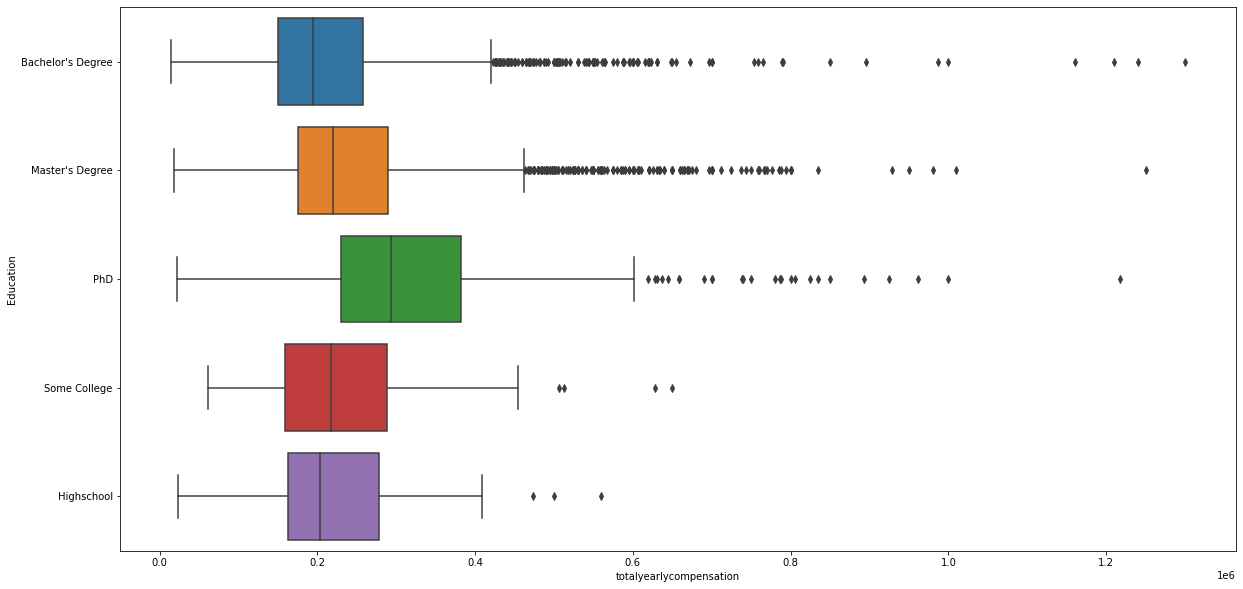

In [11]:
print(faamgeduonly['Education'].value_counts())
f = plt.figure(figsize=(20,10))
sb.boxplot(y='Education',x='totalyearlycompensation',data=faamgeduonly)

Asian          2852
White          1644
Hispanic        301
Two Or More     188
Black           153
Name: Race, dtype: int64


<AxesSubplot:xlabel='totalyearlycompensation', ylabel='Race'>

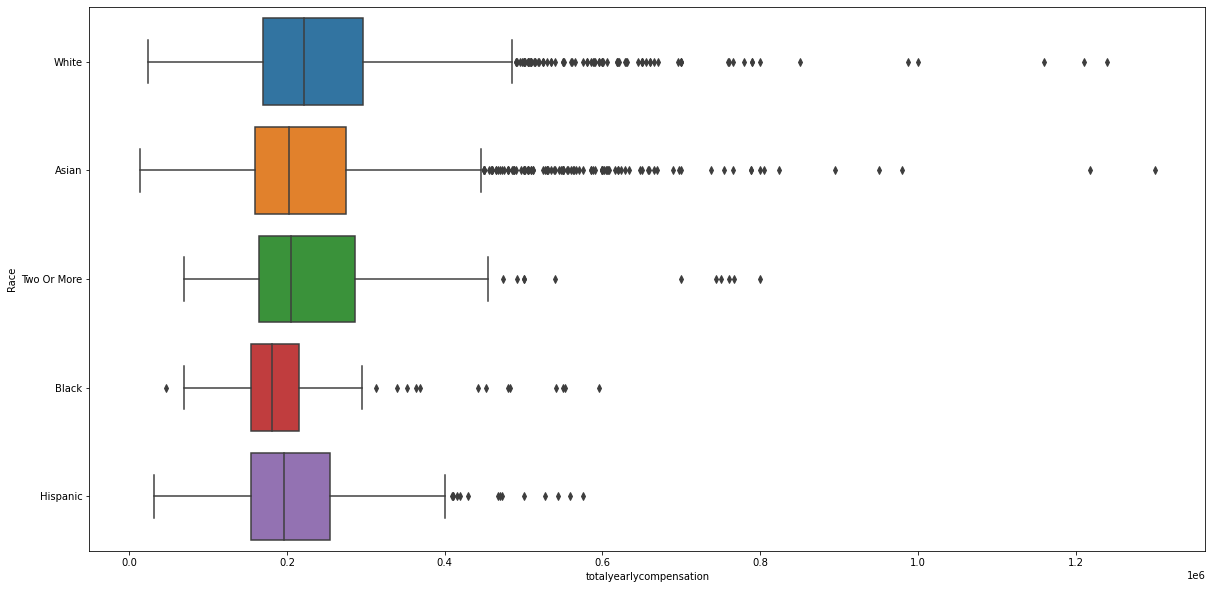

In [12]:
faamgEduRaceMerick=faamgeduonly[faamgeduonly['Race'].notna()]
print(faamgEduRaceMerick['Race'].value_counts())
f=plt.figure(figsize=(20,10))
sb.boxplot(data=faamgEduRaceMerick,x='totalyearlycompensation',y='Race')

<AxesSubplot:xlabel='basesalary', ylabel='gender'>

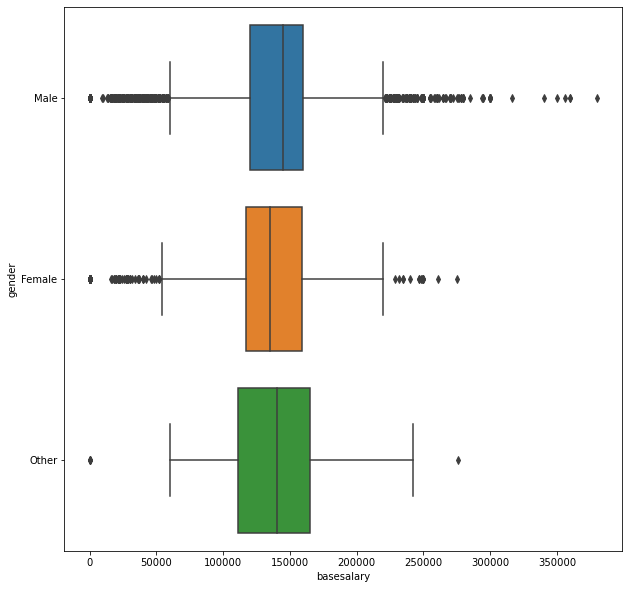

In [13]:
f= plt.figure(figsize=(10,10))
sb.boxplot(data=faamg, x="basesalary", y="gender")

Seattle, WA                                5456
Redmond, WA                                1722
Mountain View, CA                           944
Sunnyvale, CA                               911
New York, NY                                877
Cupertino, CA                               767
San Francisco, CA                           752
Menlo Park, CA                              723
Vancouver, BC, Canada                       337
London, EN, United Kingdom                  289
Bellevue, WA                                244
Bangalore, KA, India                        243
Palo Alto, CA                               241
Austin, TX                                  217
Boston, MA                                  206
Hyderabad, TS, India                        200
Toronto, ON, Canada                         131
Los Angeles, CA                             126
Herndon, VA                                 102
Dublin, DN, Ireland                         101
Zurich, ZH, Switzerland                 

<AxesSubplot:xlabel='basesalary', ylabel='location'>

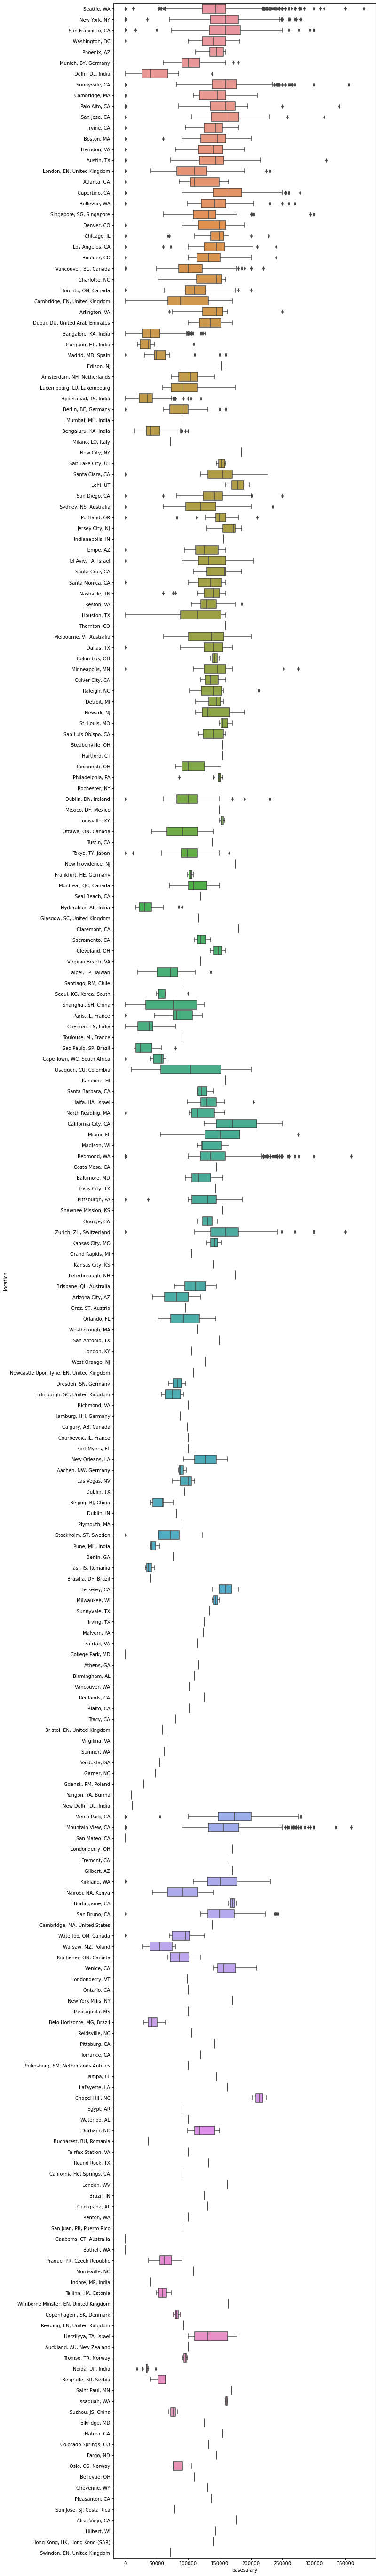

In [14]:
f= plt.figure(figsize=(10,100))
print(faamg["location"].value_counts())
sb.boxplot(data=faamg, x="basesalary",y="location")

<AxesSubplot:xlabel='yearsatcompany', ylabel='totalyearlycompensation'>

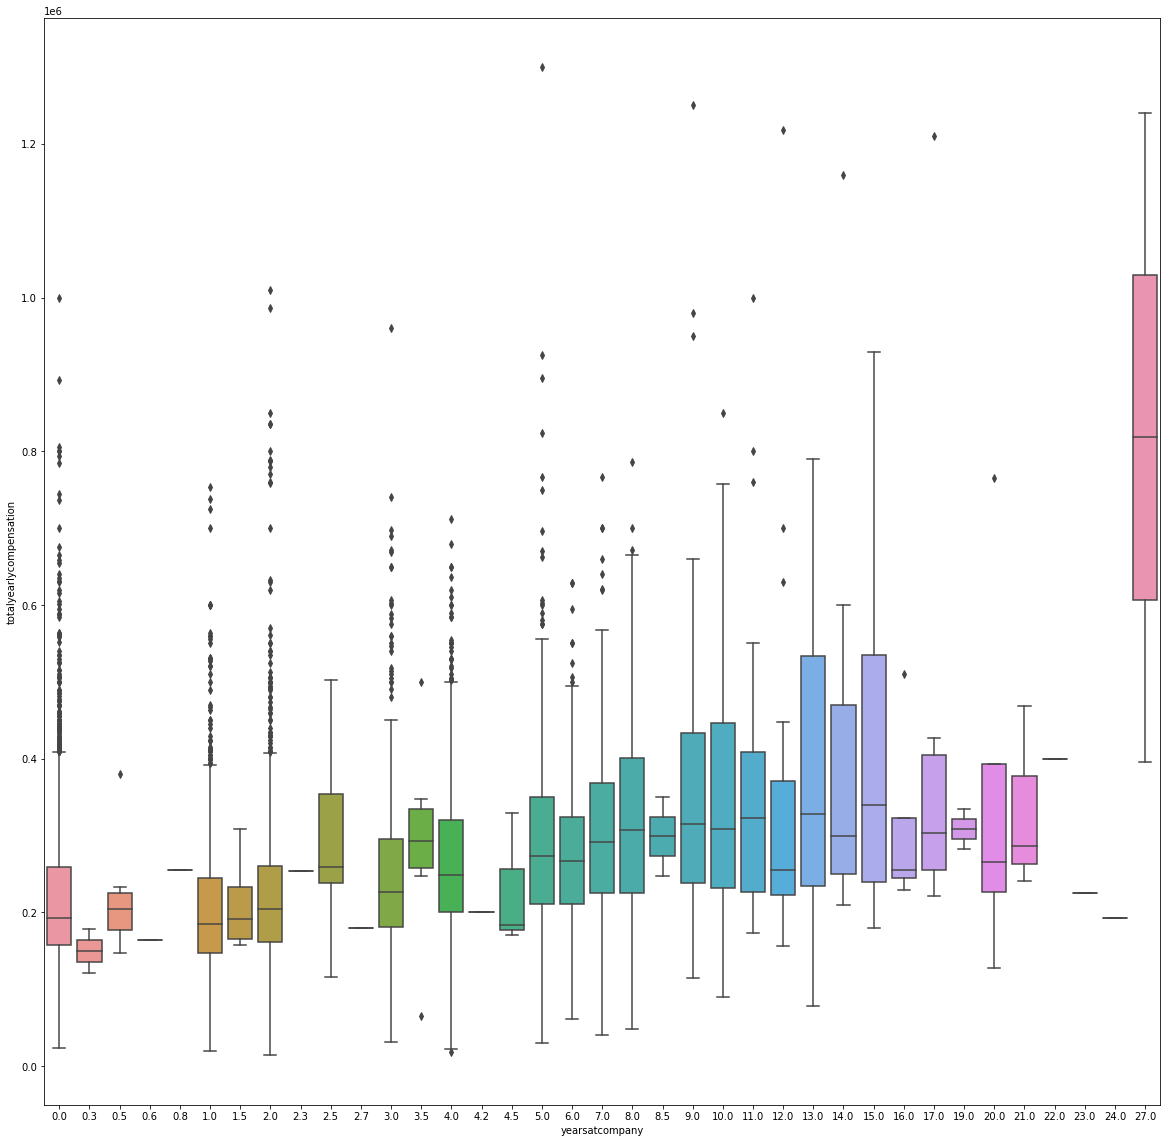

In [15]:
f=plt.figure(figsize=(20,20))
sb.boxplot(data=faamgeduonly,x='yearsatcompany',y='totalyearlycompensation' )




<AxesSubplot:xlabel='yearsofexperience', ylabel='totalyearlycompensation'>

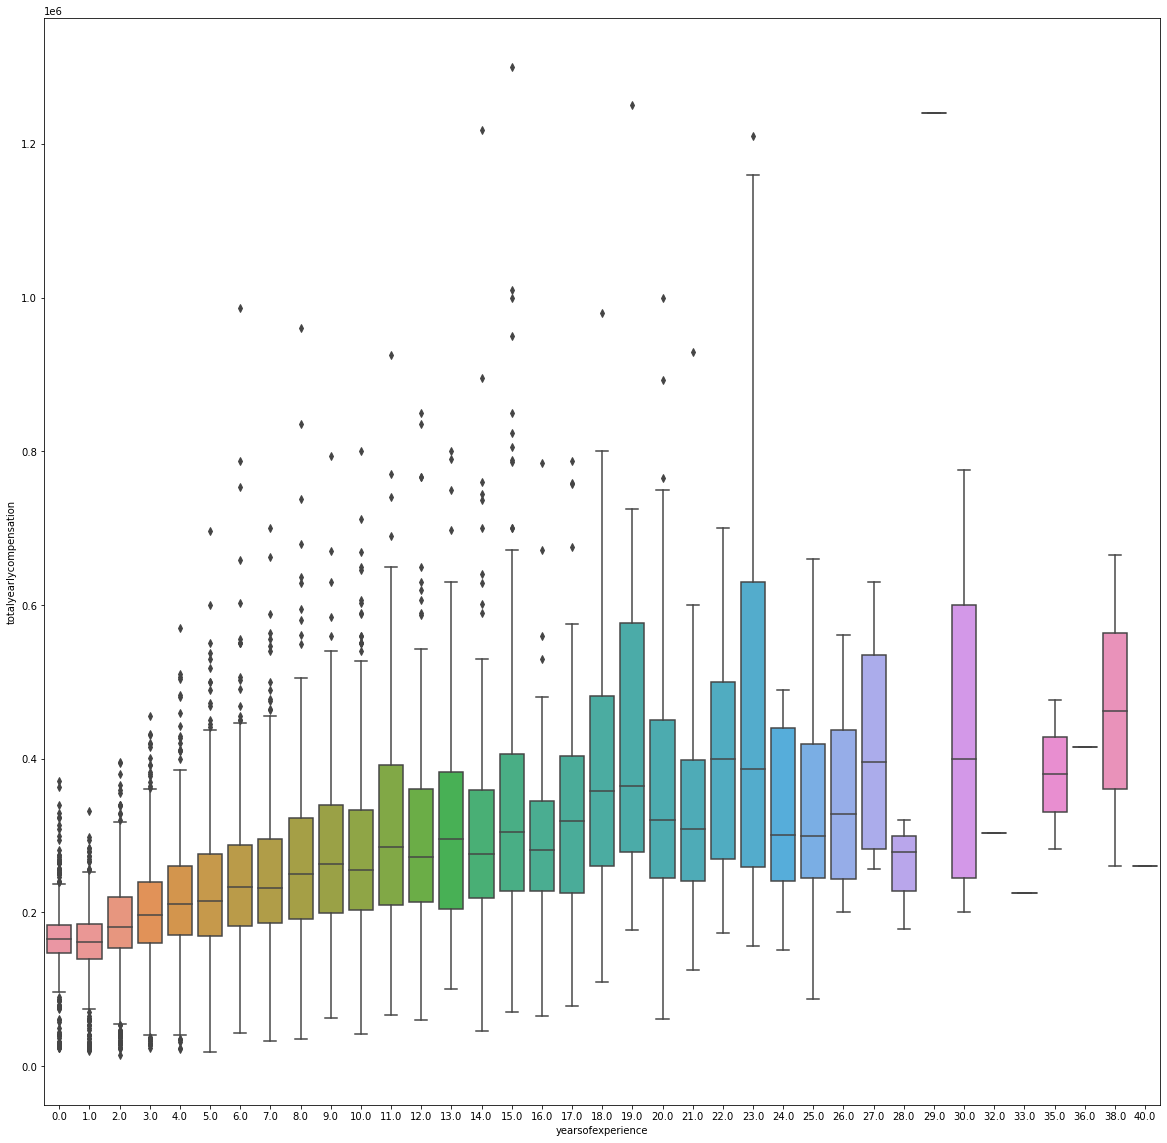

In [16]:
f=plt.figure(figsize=(20,20))
sb.boxplot(data=faamgeduonly, x='yearsofexperience', y='totalyearlycompensation')